# Kaggle's Google PlayStore Data EDA

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Read the CSV File
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Convert the Size column such that it has same Units (MB)

---
### Observations:
1. One of the values in the Size column is "*Varies with device*". We will replace it with NaN.
2. The Size column has values in *KB* and *MB*. We will convert all the values to MB.
---

In [4]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [5]:
# First of all, check the missing values in Size column
df['Size'].isnull().sum()

0

- There are no missin values in the `Size` column.

In [6]:
# Calculate the values that contains 'M' in them in Size column
df['Size'].str.contains('M').sum()

8829

In [7]:
# Calculate the values that contains 'k' in them in Size column
df['Size'].str.contains('k').sum()

316

In [8]:
# Calculate the values that contains 'Varies with device' in them in Size column
df['Size'].str.contains('Varies with device').sum()

1695

In [9]:
# Convert the Size Column into MB First.
def convert_size(entry):
    if isinstance(entry, str):
        if 'k' in entry:
            return float(entry.replace('k', '')) / 1024
        elif 'M' in entry:
            return float(entry.replace('M', '')) 
        elif 'Varies with device' in entry:
            return np.nan
    return entry

        

In [10]:
df['Size'].sample(8)

6385     17M
4489     21M
1276    8.8M
3083     25M
1975     63M
5236    5.3M
565     6.1M
1093     22M
Name: Size, dtype: object

In [11]:
# Apply the function to the Size Column and update it.
df['Size_MB'] = df['Size'].apply(convert_size)
df['Size_MB'].sample(8)

2026    24.0
9013    13.0
1365    55.0
4253     2.6
926      NaN
6990    47.0
6329    23.0
524      7.2
Name: Size_MB, dtype: float64

In [12]:
# Rename the column 'Size' to 'Size in Bytes'
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


## Convert the Installs column to numeric values

In [13]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [14]:
# Check Value Counts.
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [15]:
# Check missing values
df['Installs'].isnull().sum()

0

### To Dos
1. Remove the `+` and `,` from the `Installs` column.
2. Convert the `Installs` column to `int` values.

In [16]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x)) 
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

### Creating Categories of Install Column based on number of installs.

In [17]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [18]:
print('Min: ', df['Installs'].min())
print('Max: ', df['Installs'].max())

Min:  0
Max:  1000000000


In [19]:
# Create bin for each range of installs
bins = [-1 , 0 , 10 , 1000 , 10000 , 100000 , 1000000 , 10000000 , 1000000000]
labels = ['NA' , '0+' , '10+' , '1K+' , '10K+' , '100K+' , '1M+' , '10M+']
df['Install_Category'] = pd.cut(df['Installs'] , bins=bins , labels=labels)
df['Install_Category'].value_counts()

Install_Category
10+      2161
100K+    2118
1M+      2004
10K+     1648
1K+      1531
10M+      828
0+        535
NA         15
Name: count, dtype: int64

## Convert the Price column to numeric values

In [20]:
df['Price'].value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

### To Dos
1. Remove `$` from the `Price` column.

In [21]:
# First see, how many entries contains $ sign
df['Price'].str.contains('$').sum()

10840

In [22]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [23]:
# Removing $ sign from the Price Column
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].astype(float)
df['Price'].value_counts()

Price
0.00     10040
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: count, Length: 92, dtype: int64

In [24]:
df['Price'].value_counts().sum()

10840

### Minimum, Maximum and Average values of `PRICE`

In [25]:
# print the min, max, and average value of price
print('Min: ', df['Price'].min())
print('Max: ', df['Price'].max())
print('Mean: ', df['Price'].mean())

Min:  0.0
Max:  400.0
Mean:  1.027368081180812


Now, `Price`, `Size`, `Installs` and `Reviews` columns has numeric values.

## Missing values in the DataFrame

In [26]:
# find the missing values in dataframe and sort them
df.isnull().sum().sort_values(ascending=False)

Size_MB             1695
Rating              1474
Current Ver            8
Android Ver            2
Type                   1
App                    0
Category               0
Reviews                0
Size                   0
Installs               0
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Install_Category       0
dtype: int64

In [27]:
# find the missing values in datagrame and sort them in percentage
round(df.isnull().mean().sort_values(ascending=False) * 100 , 2)

Size_MB             15.64
Rating              13.60
Current Ver          0.07
Android Ver          0.02
Type                 0.01
App                  0.00
Category             0.00
Reviews              0.00
Size                 0.00
Installs             0.00
Price                0.00
Content Rating       0.00
Genres               0.00
Last Updated         0.00
Install_Category     0.00
dtype: float64

In [28]:
# find total missing values in dataframe
df.isnull().sum().sum()

3180

<Axes: >

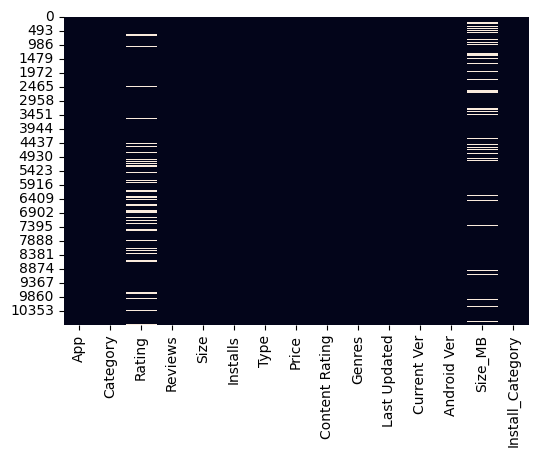

In [29]:
# Plot Missing Values
plt.figure(figsize=(6, 4))
# plot heatmap of missing values
sns.heatmap(df.isnull(), cbar=False)

Text(0.5, 1.0, 'Percentage of Missing Data in Each Column')

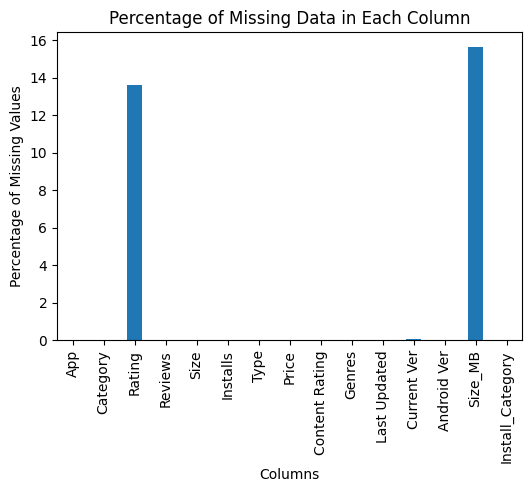

In [30]:
# Plot Missing Values
plt.figure(figsize=(6, 4))
percent_missing = df.isnull().sum() * 100 / len(df)
# plot missing values percentage
percent_missing.plot.bar()
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Data in Each Column')

<Axes: >

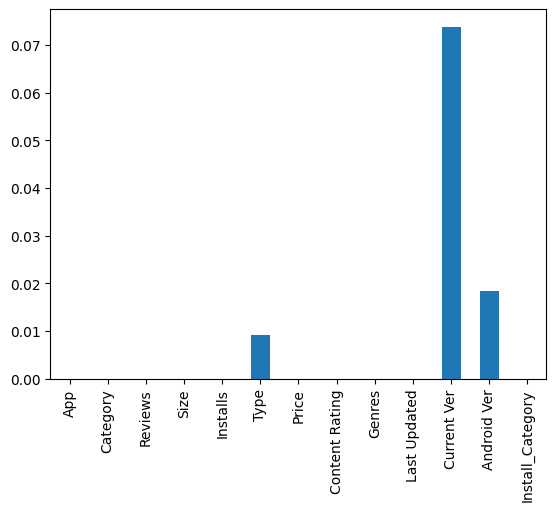

In [31]:
percent_missing[percent_missing < 1].plot.bar()

## Descriptive Statistics

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.000000,4.0,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.000000,38.0,2094.0,54775.5,7.815831e+07
Installs,10840.0,1.546434e+07,8.502936e+07,0.000000,1000.0,100000.0,5000000.0,1.000000e+09
Price,10840.0,1.027368e+00,1.594970e+01,0.000000,0.0,0.0,0.0,4.000000e+02
Size_MB,9145.0,2.151617e+01,2.258908e+01,0.008301,4.9,13.0,30.0,1.000000e+02


<Axes: >

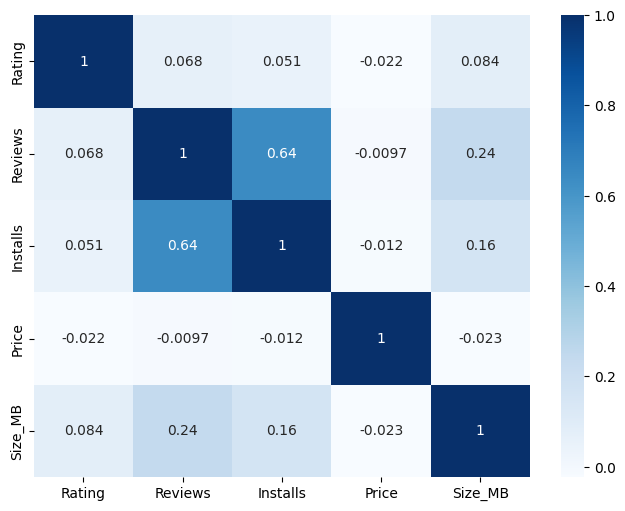

In [33]:
plt.figure(figsize=(8, 6))
numeric_columns = ['Rating' , 'Reviews' , 'Installs' , 'Price' , 'Size_MB']
# plot heatmap of correlation matrix
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='Blues')

Darker the color, higher the correlation.\
As we can see, `Reviews` and `Installs` columns are highly correlated, which makes sense obviously.

In [34]:
# Calculate correlation matrix
corr = df[numeric_columns].corr()
corr 

,Rating,Reviews,Installs,Price,Size_MB
Rating,1.000000,0.068141,0.051355,-0.021903,0.083737
Reviews,0.068141,1.000000,0.643122,-0.009667,0.238214
Installs,0.051355,0.643122,1.000000,-0.011689,0.164787
Price,-0.021903,-0.009667,-0.011689,1.000000,-0.023007
Size_MB,0.083737,0.238214,0.164787,-0.023007,1.000000


In [35]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


In [36]:
# See the missing values
df.isnull().sum()

App                    0
Category               0
Rating              1474
Reviews                0
Size                   0
Installs               0
Type                   1
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            8
Android Ver            2
Size_MB             1695
Install_Category       0
dtype: int64

We see that `Type`, `Current Ver`, `Android Ver` have the least missing values. So it's better to drop such rows.

In [37]:
# Shape of column BEFORE
df.shape 

(10840, 15)

In [38]:
# drop the rows containing missing values from `Type`, `Current Ver`, `Android Ver` columns
df.dropna(subset=['Type', 'Current Ver', 'Android Ver'] , inplace=True)

In [39]:
# Shape of column AFTER
df.shape 

(10829, 15)

We see that `12` rows have been removed.

In [40]:
# Check null values again with sort
df.isnull().sum().sort_values(ascending=False)

Size_MB             1694
Rating              1469
App                    0
Category               0
Reviews                0
Size                   0
Installs               0
Type                   0
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Android Ver            0
Install_Category       0
dtype: int64

## Checking the Duplicates values

In [42]:
# find duplicates in df 
df.duplicated().sum()


483

In [45]:
# find duplicates based on 'App' column
df['App'].duplicated().sum()

1181

In [46]:
# find duplicates and sort them based on 'App' column
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Install_Category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,100K+
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,100K+
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,100K+
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,100K+
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.8,10+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,10M+
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,10M+
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,10M+
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,10000000,Free,0.00,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device,38.0,1M+


In [47]:
# Shape before
df.shape 

(10829, 15)

In [48]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [49]:
# Shape after
df.shape

(10346, 15)

Now, we've removed 483 duplicated rows from df.

## Impute `Ratings` Missing Values

In [50]:
# group rating column based on Install_Category
df.groupby('Install_Category')['Rating'].describe()

C:\Users\Faizan\AppData\Local\Temp\ipykernel_9892\516342710.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Install_Category')['Rating'].describe()


,count,mean,std,min,25%,50%,75%,max
Install_Category,,,,,,,,
NA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0+,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
10+,1255.0,4.170040,0.829420,1.0,3.8,4.4,4.8,5.0
1K+,1413.0,4.031352,0.605581,1.4,3.8,4.2,4.5,5.0
10K+,1571.0,4.094653,0.504221,1.6,3.9,4.2,4.5,4.9
100K+,2000.0,4.207100,0.378591,1.8,4.0,4.3,4.5,4.9
1M+,1815.0,4.285675,0.301071,2.0,4.1,4.3,4.5,4.9
10M+,751.0,4.372170,0.195374,3.1,4.3,4.4,4.5,4.8


In [51]:
# Fill rating column with mean value of each Install_Category group
df['Rating'] = df.groupby('Install_Category')['Rating'].transform(lambda x: x.fillna(x.mean()))

C:\Users\Faizan\AppData\Local\Temp\ipykernel_9892\2602887923.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Rating'] = df.groupby('Install_Category')['Rating'].transform(lambda x: x.fillna(x.mean()))


In [54]:
df['Rating'].isnull().sum()

14

In [55]:
# Remove the rows that contains missing values in Rating Column
df.dropna(subset=['Rating'], inplace=True)

In [56]:
df['Rating'].isnull().sum()

0

In [58]:
# Check missing values again
df.isnull().sum().sort_index(ascending=False)

Type                   0
Size_MB             1525
Size                   0
Reviews                0
Rating                 0
Price                  0
Last Updated           0
Installs               0
Install_Category       0
Genres                 0
Current Ver            0
Content Rating         0
Category               0
App                    0
Android Ver            0
dtype: int64

In [60]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_MB', 'Install_Category'],
      dtype='object')

# Insights from Data

### Questions
1. Which category has highest number of Apps?
2. Which category has highest number of installs?
3. Which category has highest number of reviews?
4. Which category has highest average rating?
5. Which category has highest average size?
6. Which category has highest average price?
7. Which Type is most common?
8. Which Content Rating is most common?
9. Which Android Version is most common?
10. Which Android Version has highest average rating?
11. Which Android Version has highest average size?
12. Which Android Version has highest average price?
13. Which Android Version has highest number of installs?
14. What average size has highest number of installs?
15. What average price has highest number of installs?

In [69]:
print("1. Which category has highest number of Apps?");print('\n')
print(df['Category'].value_counts().head(10))

print('\n')

print("2. Which category has highest number of installs?");print('\n')
print(df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10))

print('\n')

print("3. Which category has highest number of reviews?");print('\n')
print(df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10))

print('\n')

print("4. Which category has highest average rating?");print('\n')
print(df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10))

print('\n')

print("5. Which category has highest average size?");print('\n')
print(df.groupby('Category')['Size_MB'].mean().sort_values(ascending=False).head(10))

print('\n')

print("6. Which category has highest average price?");print('\n')
print(df.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10))

print('\n')

print("7. Which Type is most common?");print('\n')
print(df['Type'].value_counts())

print('\n')

print("8. Which Content Rating is most common?");print('\n')
print(df['Content Rating'].value_counts())

print('\n')

print("9. Which Android Version is most common?");print('\n')
print(df['Android Ver'].value_counts())

print('\n')

print("10. Which Android Version has highest average rating?");print('\n')
print(df.groupby('Android Ver')['Rating'].mean().sort_values(ascending=False).head(10))

print('\n')

print("11. Which Android Version has highest average size?");print('\n')
print(df.groupby('Android Ver')['Size_MB'].mean().sort_values(ascending=False).head(10))

print('\n')

print("12. Which Android Version has highest average price?");print('\n')
print(df.groupby('Android Ver')['Price'].mean().sort_values(ascending=False).head(10))

print('\n')

print("13. Which Android Version has highest number of installs?");print('\n')
print(df.groupby('Android Ver')['Installs'].sum().sort_values(ascending=False).head(10))

print('\n')

print("14. What average size has highest number of installs?");print('\n')
print(df.groupby('Size_MB')['Installs'].sum().sort_values(ascending=False).head(10))

print('\n')

print("15. What average price has highest number of installs?");print('\n')
print(df.groupby('Price')['Installs'].sum().sort_values(ascending=False).head(10))

1. Which category has highest number of Apps?


Category
FAMILY             1937
GAME               1121
TOOLS               841
BUSINESS            426
MEDICAL             407
PRODUCTIVITY        406
PERSONALIZATION     385
LIFESTYLE           372
COMMUNICATION       366
FINANCE             358
Name: count, dtype: int64


2. Which category has highest number of installs?


Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64


3. Which category has highest number of reviews?


Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VID